In [1]:
import os
import sys
import glob
import datetime
import calendar

import numpy as np
import xarray as xr
import scipy
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
DIR_CX = '/glade/scratch/lgchen/data/OISSH_NOAA/biasCorrection_crossoverAdjustment/crossoverFiles_fromEric'
fn_cx = 'cx_c2_j3.nc'

In [3]:
ds_cx = xr.open_dataset(filename_or_obj = DIR_CX + '/' + fn_cx, mask_and_scale = True, decode_times = True)
print(ds_cx)

ds_cx = ds_cx.sortby(ds_cx['time'][:, 0])

sla_diff = ds_cx['sla'][:, 0] - ds_cx['sla'][:, 1]
print('\n\nsla_diff: ', sla_diff)

<xarray.Dataset>
Dimensions:       (xover: 34983, leg: 2, track: 1524)
Coordinates:
    lat           (xover) float64 ...
    lon           (xover) float64 ...
    track         (xover, leg) int32 ...
Dimensions without coordinates: xover, leg
Data variables:
    time          (xover, leg) datetime64[ns] ...
    sla           (xover, leg) float32 ...
    topo          (xover, leg) float32 ...
    satid         (track) int8 ...
    cycle         (track) int16 ...
    pass          (track) int16 ...
    equator_lon   (track) float64 ...
    equator_time  (track) datetime64[ns] ...
    start_time    (track) datetime64[ns] ...
    end_time      (track) datetime64[ns] ...
    nr_xover      (track) int16 ...
    nr_alt        (track) int16 ...
Attributes:
    Conventions:  CF-1.5
    title:        RADS 4.0 crossover file
    institution:  EUMETSAT / NOAA / TU Delft
    references:   RADS Data Manual, Version 4.4.0
    history:      2023-07-20 21:19:04 UTC: radsxogen -d --ymd=20220201,202203.

In [13]:
np.set_printoptions(threshold=np.inf)

display(ds_cx['cycle'])
print(ds_cx['cycle'].data)
print('\n')
print(ds_cx['pass'])
print('\n')
print(ds_cx['track'][:, 0])
print(ds_cx['track'].data[:, 0])

<xarray.DataArray 'cycle' (track: 1524)>
array([153, 153, 153, ..., 223, 223, 223], dtype=int16)
Dimensions without coordinates: track
Attributes:
    long_name:  cycle number

[153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153 153
 153 153 153 153 153 153 153 153 153 153 153 153 15

In [16]:
# check if c2 track number (or any dataarray) is in ascending order?
# def is_ascending(data_array, dimension):
def is_ascending(data_array):  # assume 1D array
    values = data_array.values
    return np.all(np.diff(values) >= 0)

ref_time = np.datetime64('1985-01-01T00:00:00')
time_flt = (ds_cx['time'][:, 0] - ref_time) / np.timedelta64(1, 's')

# isA = is_ascending(ds_cx['track'][:, 0])
isA = is_ascending(time_flt)
print('isA = ', isA)

isA =  True


Text(0.5, 1.0, 'xover-lat relation in cx_c2_j3.nc')

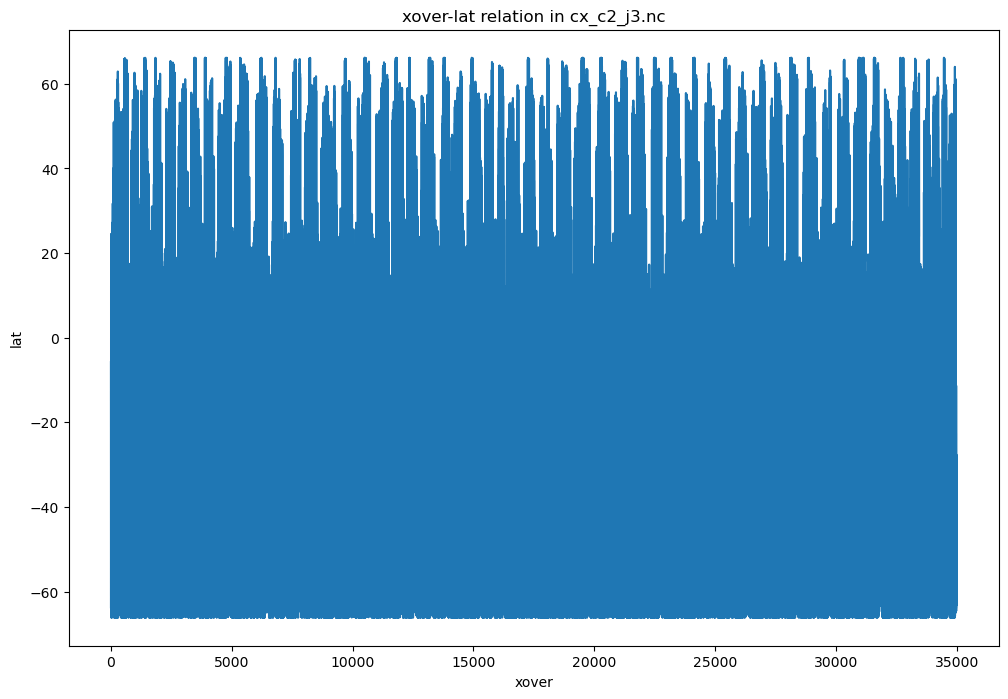

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
x = range(ds_cx.dims['xover'])
# check lat
ax.plot(x, ds_cx.lat)
ax.set_xlabel('xover')
ax.set_ylabel('lat')
ax.set_title('xover-lat relation in cx_c2_j3.nc')

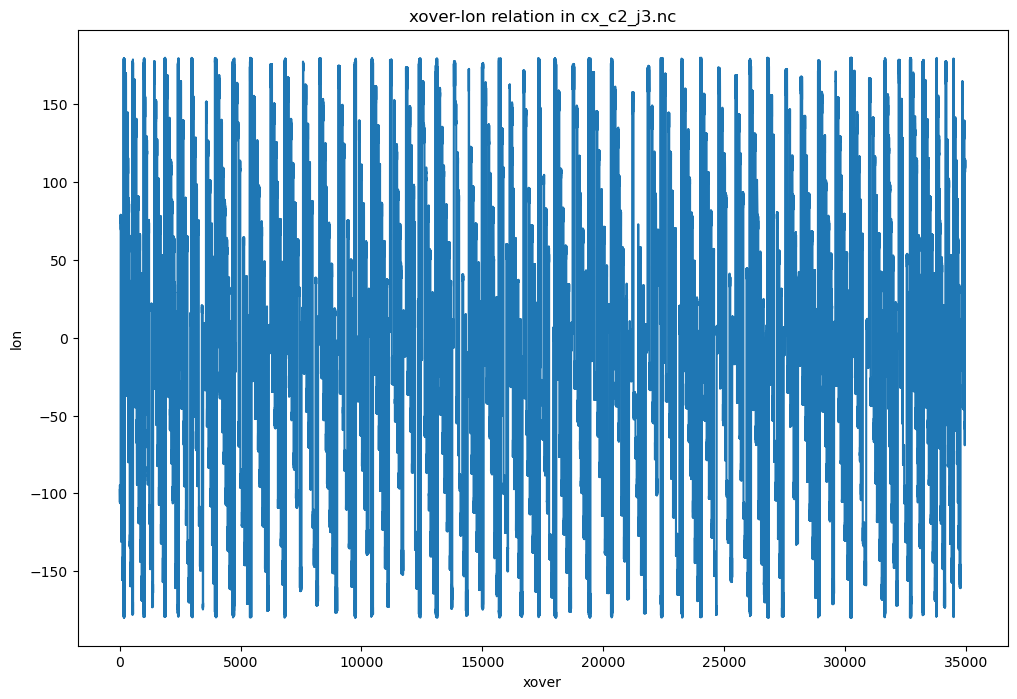

In [5]:
ax.clear()
ax.plot(x, ds_cx.lon)
ax.set_xlabel('xover')
ax.set_ylabel('lon')
ax.set_title('xover-lon relation in cx_c2_j3.nc')
# plt.show()
fig

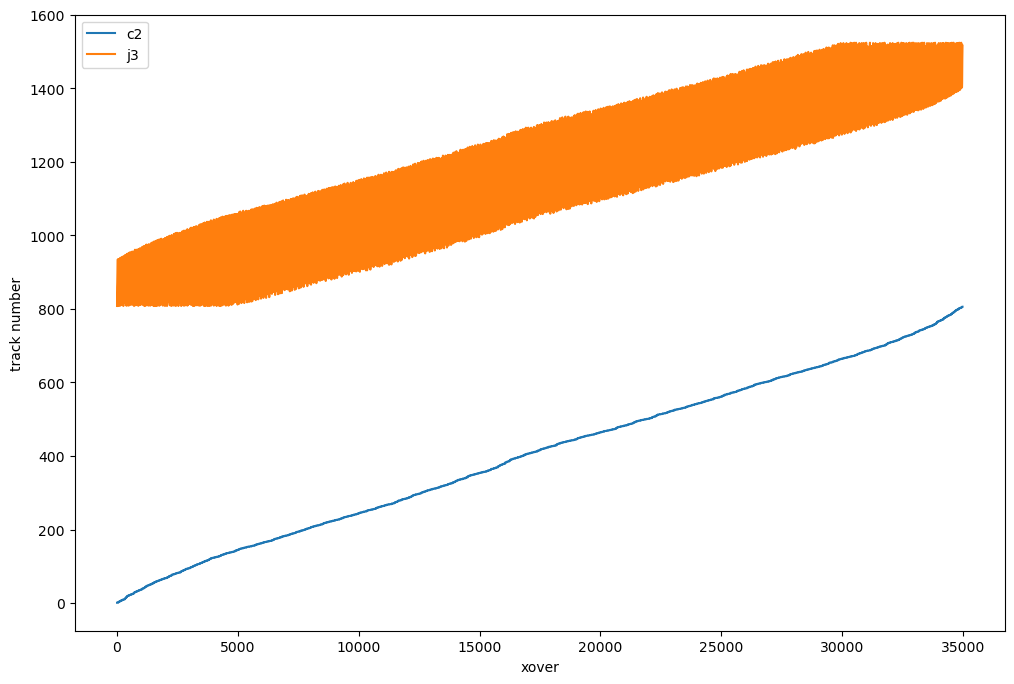

In [6]:
ax.clear()
ax.plot(x, ds_cx['track'][:, 0], label='c2')
ax.plot(x, ds_cx['track'][:, 1], label='j3')
ax.set_xlabel('xover')
ax.set_ylabel('track number')
ax.legend()
fig

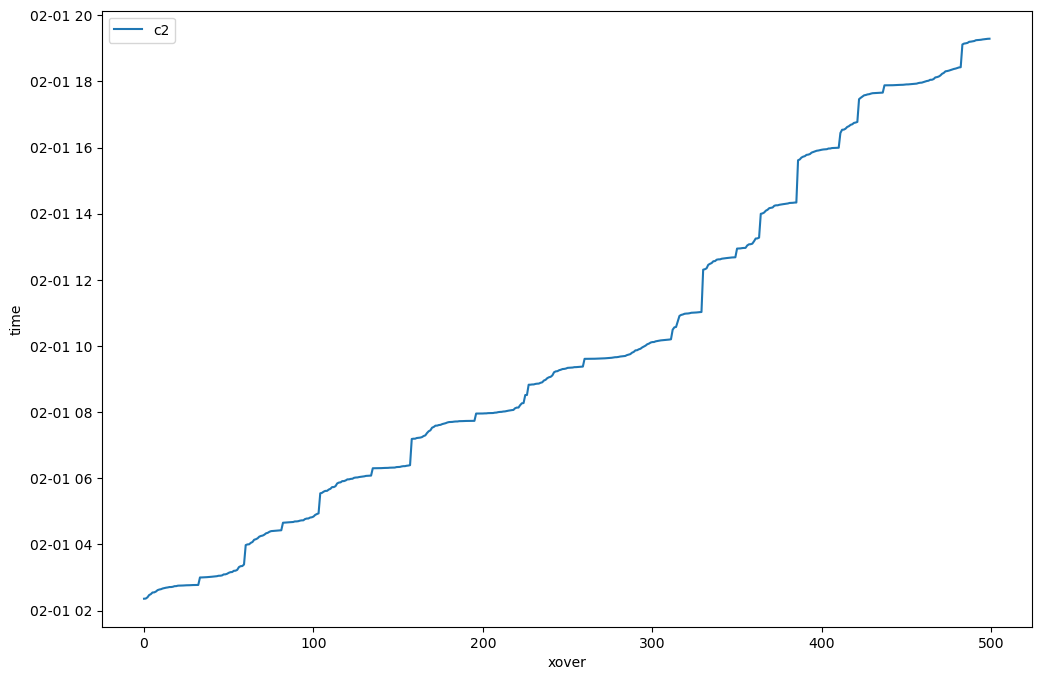

In [12]:
ax.clear()
# ax.plot(x, ds_cx['time'][:, 0], label='c2')
# ax.plot(x, ds_cx['time'][:, 1], label='j3')
# ax.plot(x, ds_cx['time'][:, 0], label='c2')
ax.plot(x[:500], ds_cx['time'][:500, 0], label='c2')
ax.set_xlabel('xover')
ax.set_ylabel('time')
ax.legend()
fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


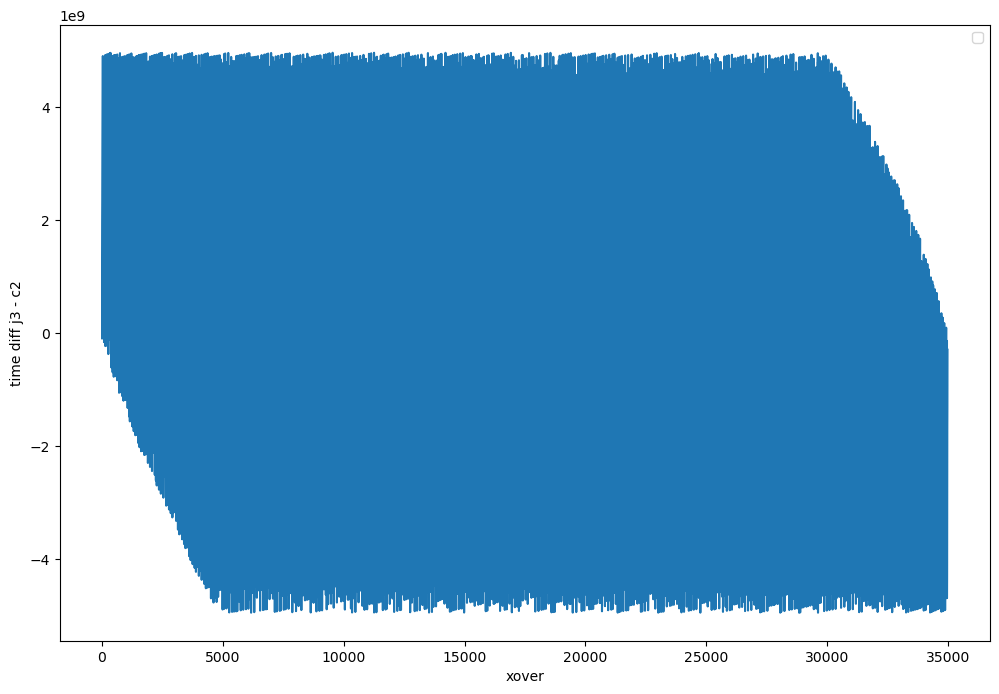

In [8]:
ax.clear()
ax.plot(x, (ds_cx['time'][:, 1] - ds_cx['time'][:, 0])/86400.)
ax.set_xlabel('xover')
ax.set_ylabel('time diff j3 - c2')
ax.legend()
fig

In [12]:
print((ds_cx['time'][:, 1] - ds_cx['time'][:, 0])/86400.)

<xarray.DataArray 'time' (xover: 34983)>
array([ -99703125,  -19287016,   60596971, ..., -460960850, -381081650,
       -300741796], dtype='timedelta64[ns]')
Coordinates:
    lat      (xover) float64 -5.766 -48.27 -62.24 -63.9 ... -62.92 -50.43 -11.55
    lon      (xover) float64 -97.85 -102.8 -105.4 -105.8 ... 114.2 111.8 107.1
Dimensions without coordinates: xover


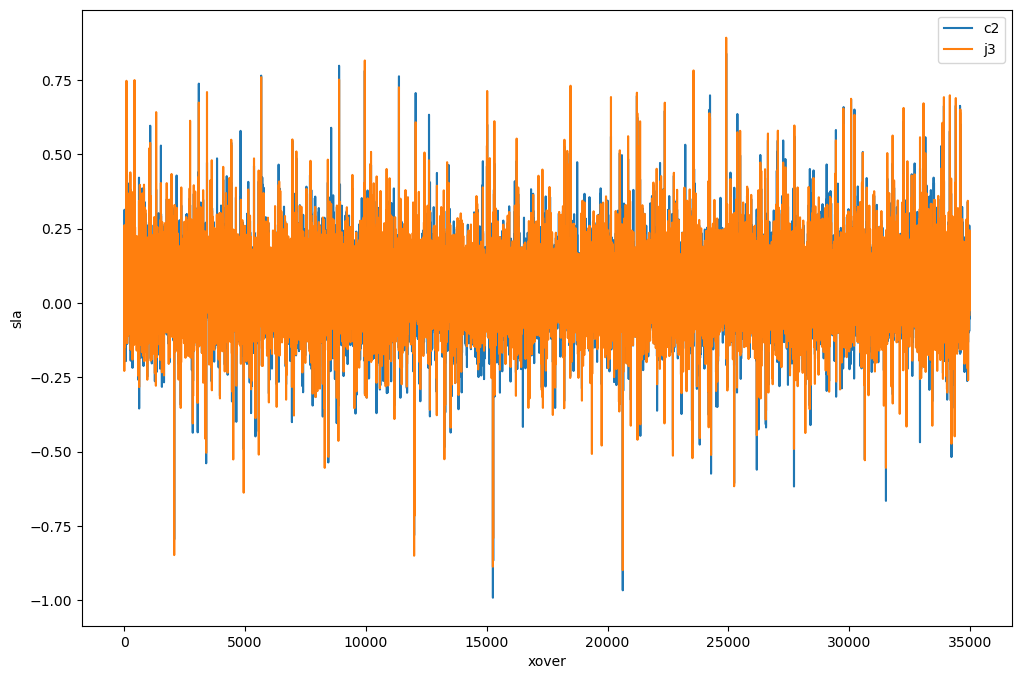

In [6]:
ax.clear()
ax.plot(x, ds_cx['sla'][:, 0], label='c2')
ax.plot(x, ds_cx['sla'][:, 1], label='j3')
ax.set_xlabel('xover')
ax.set_ylabel('sla')
ax.legend()
fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


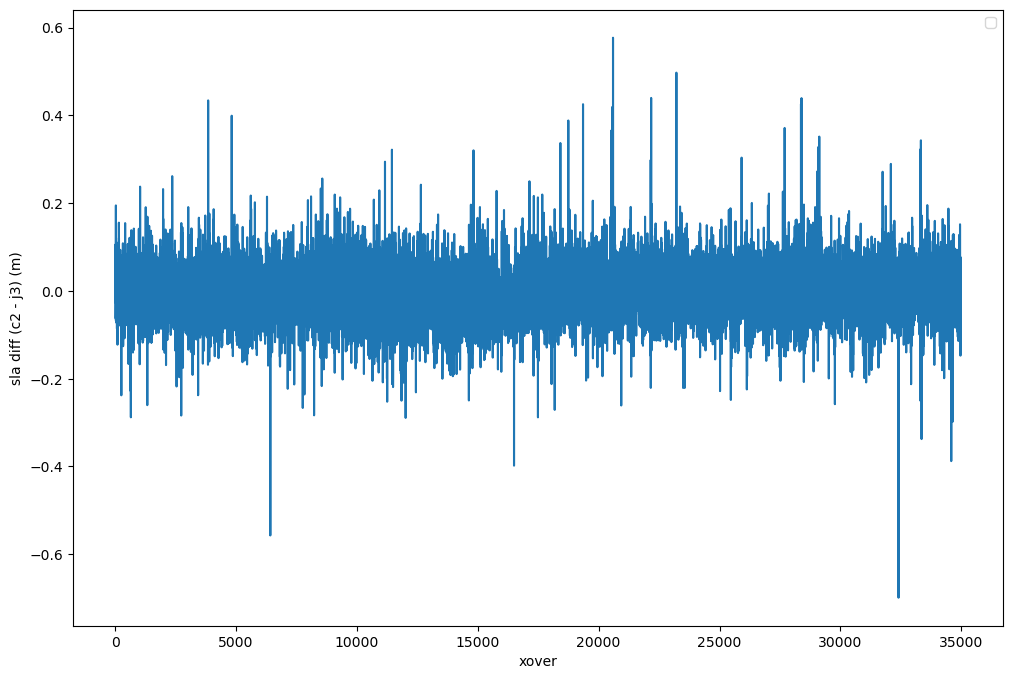

In [10]:
ax.clear()
# ax.plot(x, ds_cx['sla'][:, 0] - ds_cx['sla'][:, 1])
ax.plot(x, sla_diff)
ax.set_xlabel('xover')
ax.set_ylabel('sla diff (c2 - j3) (m)')
ax.legend()
fig

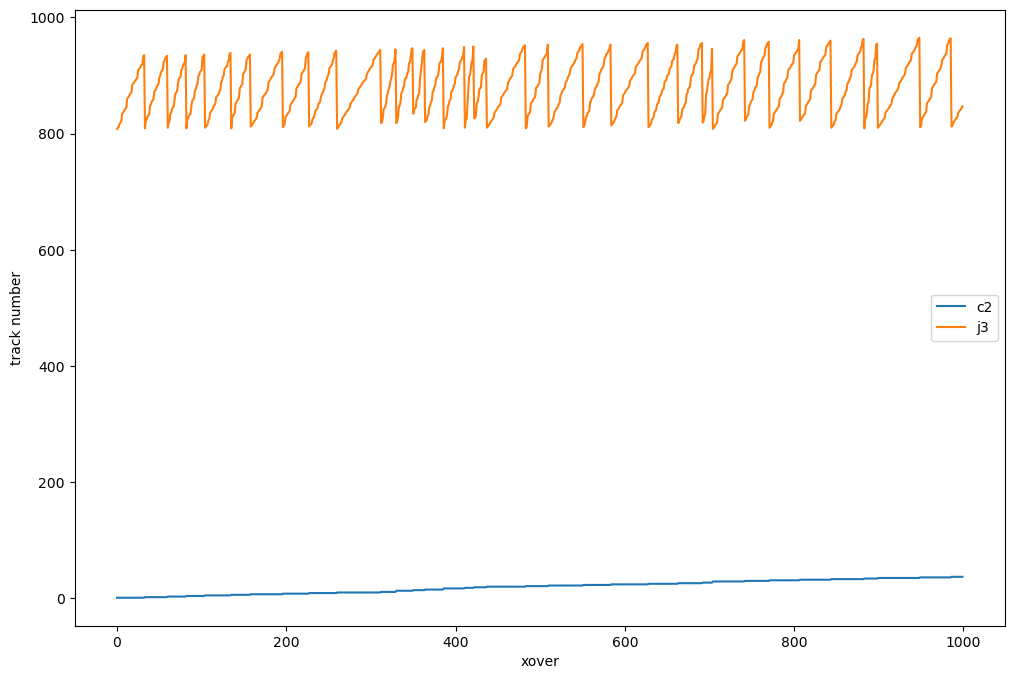

In [11]:
ax.clear()
ax.plot(x[0:1000], ds_cx['track'][0:1000, 0], label='c2')
ax.plot(x[0:1000], ds_cx['track'][0:1000, 1], label='j3')
ax.set_xlabel('xover')
ax.set_ylabel('track number')
ax.legend()
fig

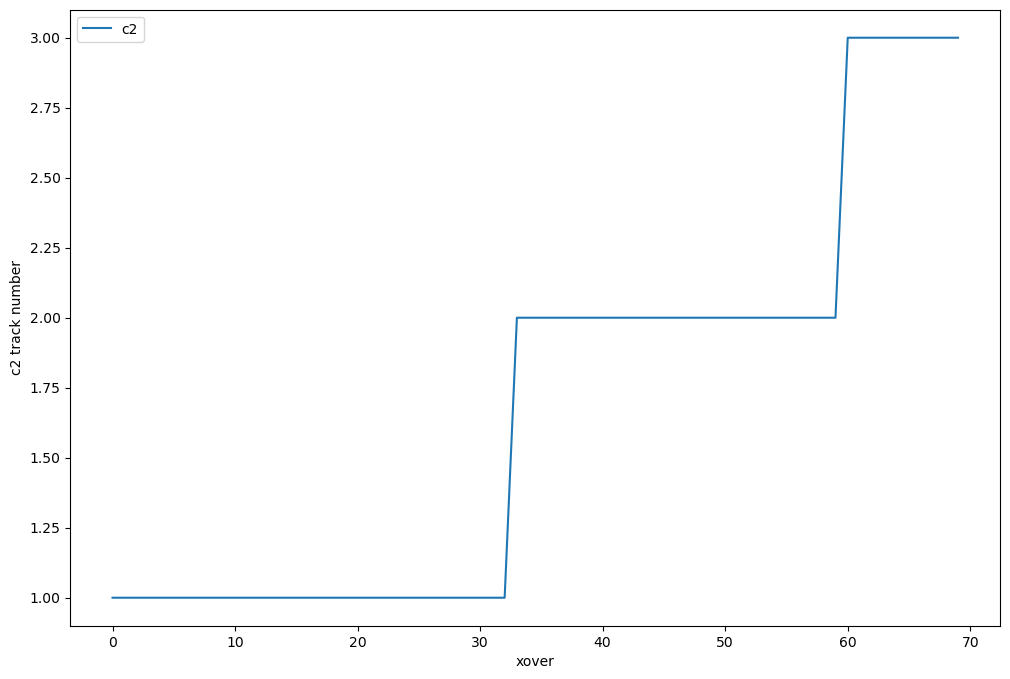

In [13]:
ax.clear()
ax.plot(x[0:70], ds_cx['track'][0:70, 0], label='c2')
# ax.plot(x[0:1000], ds_cx['track'][0:1000, 1], label='j3')
ax.set_xlabel('xover')
ax.set_ylabel('c2 track number')
ax.legend()
fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


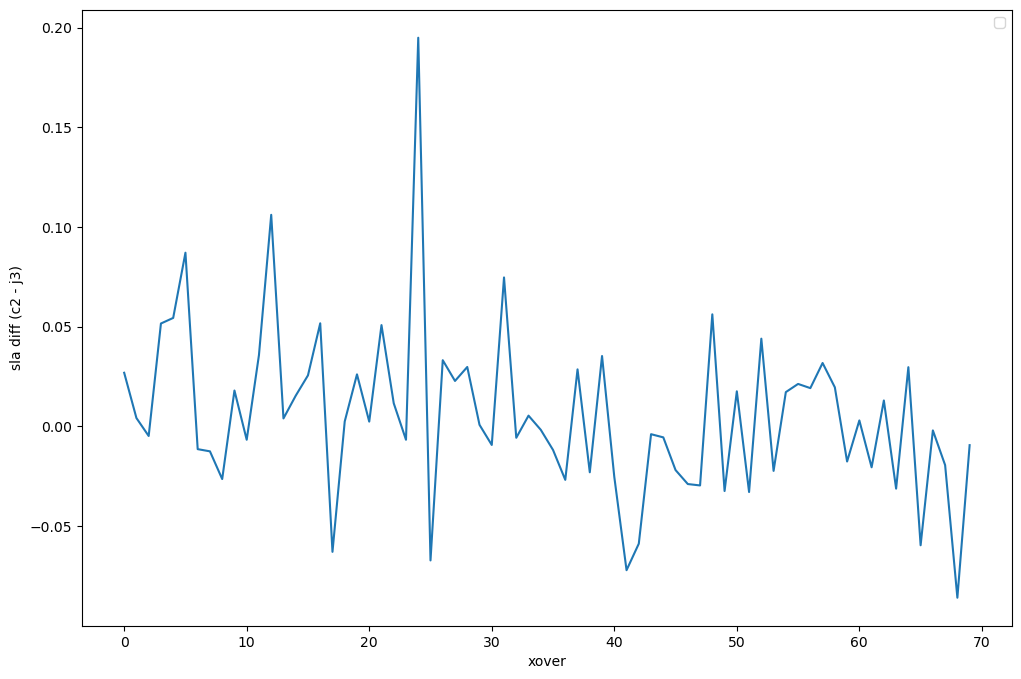

In [14]:
ax.clear()
ax.plot(x[:70], ds_cx['sla'][:70, 0] - ds_cx['sla'][:70, 1])
ax.set_xlabel('xover')
ax.set_ylabel('sla diff (c2 - j3)')
ax.legend()
fig

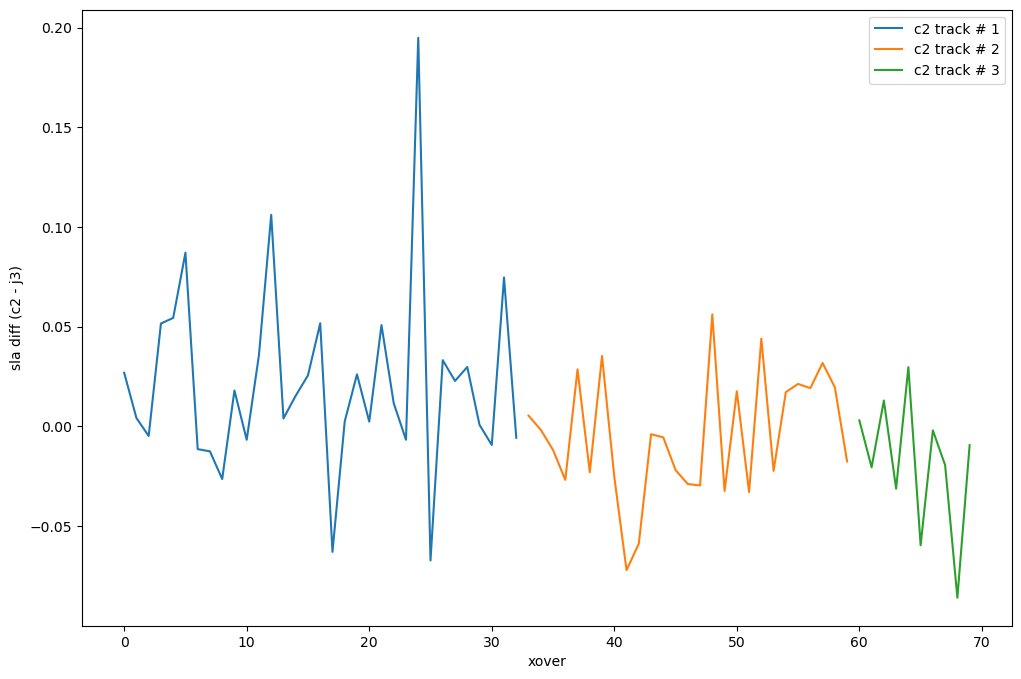

In [15]:
ax.clear()
ax.plot(x[:33], ds_cx['sla'][:33, 0] - ds_cx['sla'][:33, 1], label='c2 track # 1')
ax.plot(x[33:60], ds_cx['sla'][33:60, 0] - ds_cx['sla'][33:60, 1], label='c2 track # 2')
ax.plot(x[60:70], ds_cx['sla'][60:70, 0] - ds_cx['sla'][60:70, 1], label='c2 track # 3')
ax.set_xlabel('xover')
ax.set_ylabel('sla diff (c2 - j3)')
ax.legend()
fig

In [16]:
print(len(set(list(ds_cx['track'].data[:, 0]))))

737


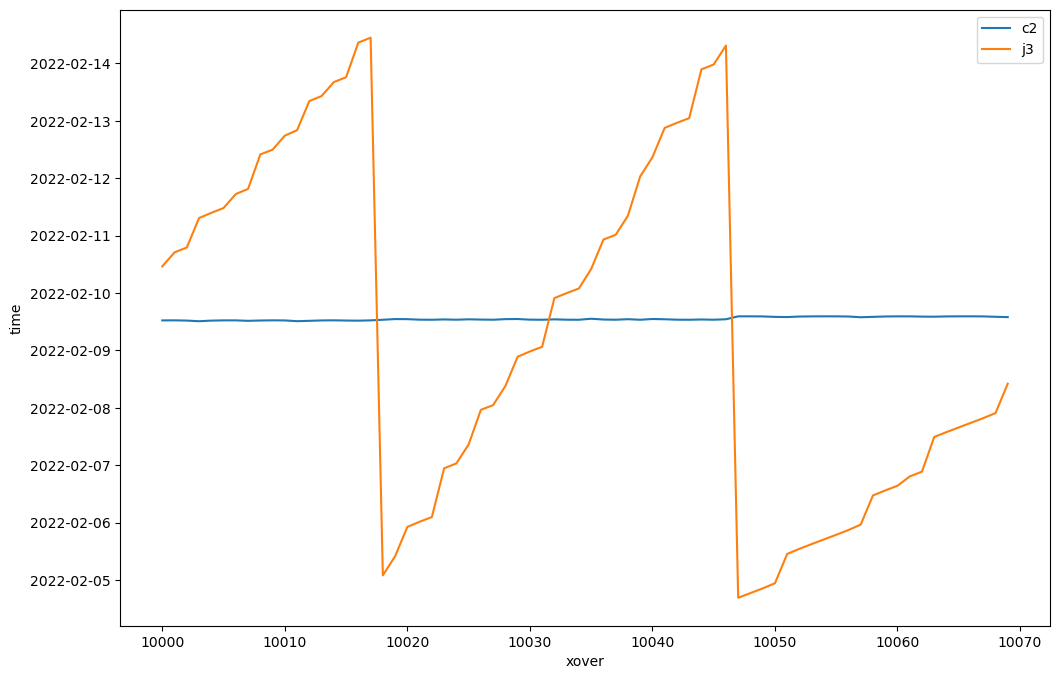

In [17]:
ax.clear()
ax.plot(x[10000:10070], ds_cx['time'][10000:10070, 0], label='c2')
ax.plot(x[10000:10070], ds_cx['time'][10000:10070, 1], label='j3')
ax.set_xlabel('xover')
ax.set_ylabel('time')
ax.legend()
fig

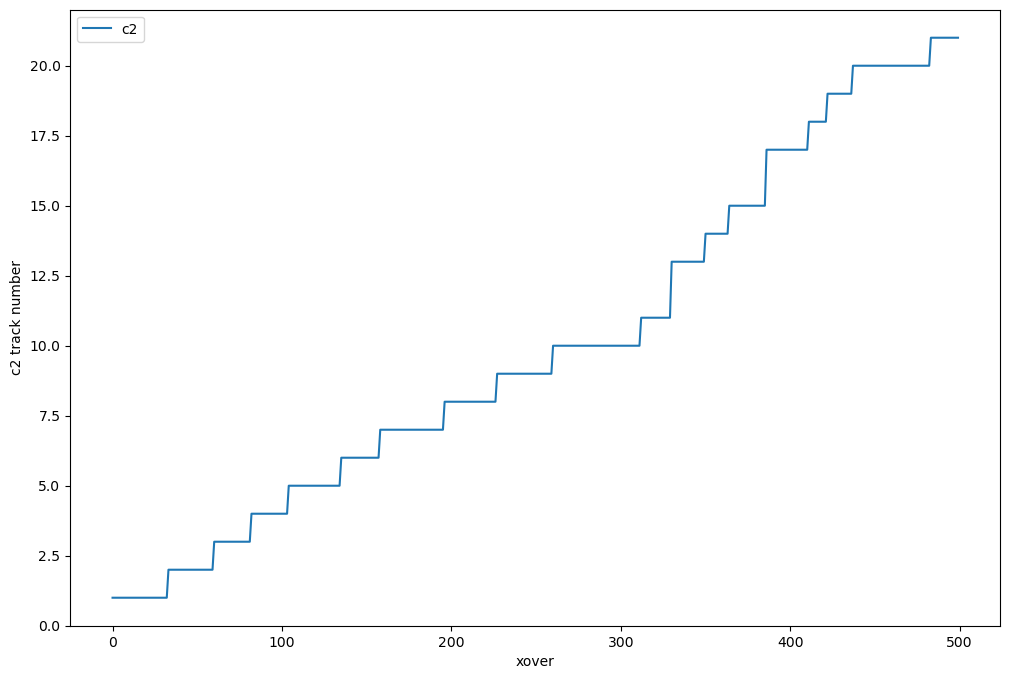

In [17]:
ax.clear()
ax.plot(x[0:500], ds_cx['track'][0:500, 0], label='c2')
# ax.plot(x[0:1000], ds_cx['track'][0:1000, 1], label='j3')
ax.set_xlabel('xover')
ax.set_ylabel('c2 track number')
ax.legend()
fig

In [6]:
lst_1stIdxOfPass = [0]
for i in range(1, 500):
    if ds_cx['track'].data[i, 0] != ds_cx['track'].data[i-1, 0]:
        lst_1stIdxOfPass.append(i)
print('len(lst_1stIdxOfPass): \n', len(lst_1stIdxOfPass))
print('lst_1stIdxOfPass: \n', lst_1stIdxOfPass)
numOfObsForEachPass = [lst_1stIdxOfPass[i] - lst_1stIdxOfPass[i-1] for i in range(1, len(lst_1stIdxOfPass))]
print('numOfObsForEachPass: \n', numOfObsForEachPass)

len(lst_1stIdxOfPass): 
 19
lst_1stIdxOfPass: 
 [0, 33, 60, 82, 104, 135, 158, 196, 227, 260, 312, 330, 350, 364, 386, 411, 422, 437, 483]
numOfObsForEachPass: 
 [33, 27, 22, 22, 31, 23, 38, 31, 33, 52, 18, 20, 14, 22, 25, 11, 15, 46]


In [7]:
da_c2_track = ds_cx['track'][:, 0]
unique_c2_track = np.unique(da_c2_track.values)
print('unique c2 track numbers: ', len(unique_c2_track))
arr_1stIdxOfPass = np.searchsorted(da_c2_track.values, unique_c2_track, side='left')
print(len(arr_1stIdxOfPass))
print(arr_1stIdxOfPass)

diff = np.diff(arr_1stIdxOfPass)
indices = np.where(diff <= 1)  # can NOT put + 1 here!
print(indices)
arr_1stIdxOfPass = np.delete(arr_1stIdxOfPass, indices)
print(len(arr_1stIdxOfPass))
print(arr_1stIdxOfPass)

# print(np.diff(arr_1stIdxOfPass))
# print(min(np.diff(arr_1stIdxOfPass)))
# print(np.diff(arr_1stIdxOfPass).argmin())

unique c2 track numbers:  737
737
[    0    33    60    82   104   135   158   196   227   260   312   330
   350   364   386   411   422   437   483   510   551   584   628   663
   692   704   742   771   807   844   883   899   949   986  1034  1058
  1108  1132  1150  1185  1213  1250  1310  1337  1378  1424  1436  1477
  1509  1521  1551  1592  1614  1662  1697  1746  1776  1827  1847  1897
  1942  1984  2053  2067  2110  2134  2150  2181  2228  2262  2292  2355
  2398  2433  2482  2538  2604  2639  2654  2703  2734  2770  2802  2842
  2910  2957  3024  3064  3109  3140  3162  3196  3233  3269  3316  3392
  3433  3448  3513  3564  3602  3629  3664  3725  3747  3803  3814  3830
  3867  3885  3933  4005  4059  4121  4195  4230  4275  4295  4321  4367
  4417  4455  4506  4533  4612  4664  4741  4803  4868  4911  4946  4987
  5048  5095  5148  5223  5263  5344  5379  5460  5549  5595  5679  5712
  5738  5779  5841  5889  5956  6003  6054  6093  6167  6228  6298  6376
  6407  6454  649

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[numpy.datetime64('2022-02-01T02:21:23.167927552'), numpy.datetime64('2022-02-01T02:46:22.584331776'), numpy.datetime64('2022-02-01T02:59:58.291026432'), numpy.datetime64('2022-02-01T03:23:30.410659328'), numpy.datetime64('2022-02-01T03:58:39.335962624'), numpy.datetime64('2022-02-01T04:25:36.118194432'), numpy.datetime64('2022-02-01T04:39:14.619066112'), numpy.datetime64('2022-02-01T04:56:12.897013504'), numpy.datetime64('2022-02-01T05:32:37.219371264'), numpy.datetime64('2022-02-01T06:04:47.798096128'), numpy.datetime64('2022-02-01T06:18:05.009283072'), numpy.datetime64('2022-02-01T06:23:41.659256832'), numpy.datetime64('2022-02-01T07:11:12.118793216'), numpy.datetime64('2022-02-01T07:44:06.129274368'), numpy.datetime64('2022-02-01T07:57:19.538768384'), numpy.datetime64('2022-02-01T08:30:59.784864000'), numpy.datetime64('2022-02-01T08:49:37.861037312'), numpy.datetime64('2022-02-01T09:22:34.325422592'), numpy.datetime64('2022-02-01T09:36:34.525747968'), numpy.datetime64('2022-02-01T1

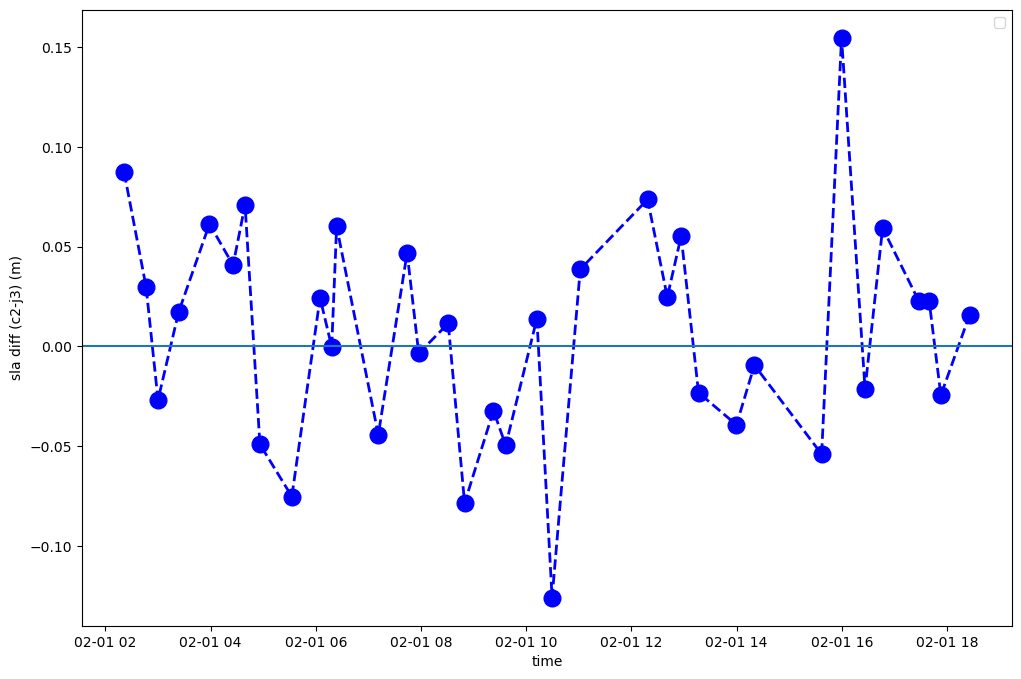

In [8]:
# BE AWARE: the time is not necessarily in ascending order!!! need to sort first! no need to sort?

x_spl = []
y_spl = []

for i in range (1, len(lst_1stIdxOfPass)):
    # print('\ni=', i)
    idxmin_loc = ds_cx['time'][lst_1stIdxOfPass[i-1] : lst_1stIdxOfPass[i], 0].argmin()
    idxmax_loc = ds_cx['time'][lst_1stIdxOfPass[i-1] : lst_1stIdxOfPass[i], 0].argmax()
    idxmin_glo = lst_1stIdxOfPass[i-1] + idxmin_loc
    idxmax_glo = lst_1stIdxOfPass[i-1] + idxmax_loc
    # print('idxmin_loc=', idxmin_loc, ', idxmin_glo=', idxmin_glo)
    # print('idxmax_loc=', idxmax_loc, ', idxmax_glo=', idxmax_glo)
    
    x_spl.append(ds_cx['time'].data[idxmin_glo, 0])
    x_spl.append(ds_cx['time'].data[idxmax_glo, 0])
    # y_spl.append(ds_cx['sla'].data[idxmin_glo, 0] - ds_cx['sla'].data[idxmin_glo, 1])
    # y_spl.append(ds_cx['sla'].data[idxmax_glo, 0] - ds_cx['sla'].data[idxmax_glo, 1])  
    y_spl.append(sla_diff.data[idxmin_glo])
    y_spl.append(sla_diff.data[idxmax_glo])

print(x_spl)  
print(y_spl)

ax.clear()
ax.plot(x_spl, y_spl, 'bo--', linewidth=2, markersize=12)
# ax.plot(x[0:1000], ds_cx['track'][0:1000, 1], label='j3')
ax.axhline()
ax.set_xlabel('time')
ax.set_ylabel('sla diff (c2-j3) (m)')
ax.legend()
fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1470
2
['2022-02-01T02:21:23.167927552' '2022-02-01T02:46:22.584331776'
 '2022-02-01T02:59:58.291026432' '2022-02-01T03:23:30.410659328'
 '2022-02-01T03:58:39.335962624' '2022-02-01T04:25:36.118194432'
 '2022-02-01T04:39:14.619066112' '2022-02-01T04:56:12.897013504'
 '2022-02-01T05:32:37.219371264' '2022-02-01T06:04:47.798096128']


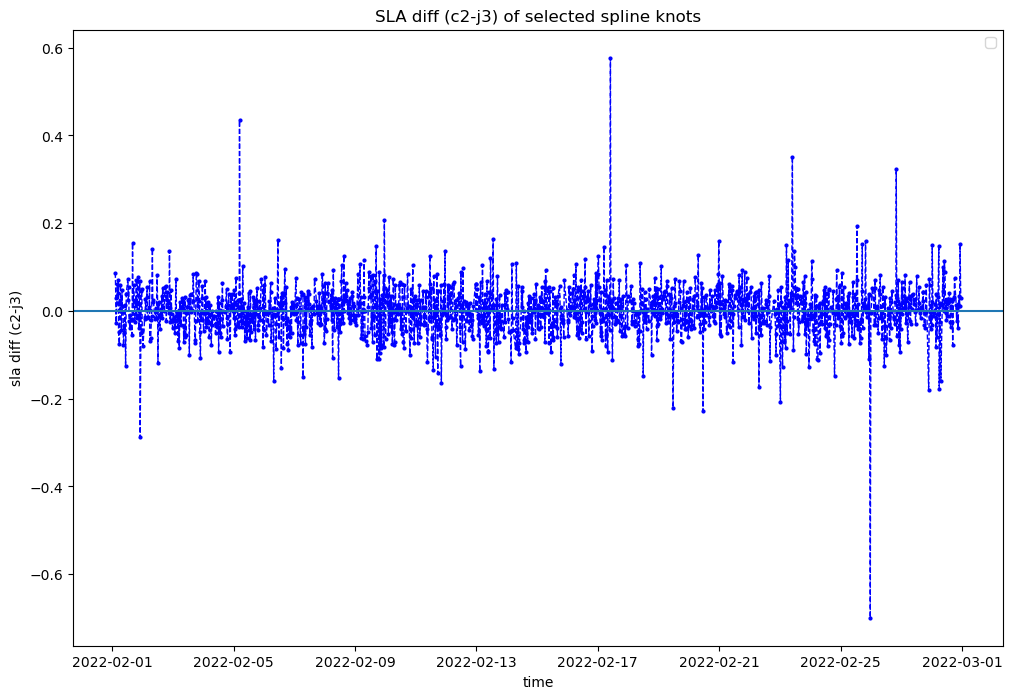

In [9]:
# BE AWARE: the time is not necessarily in ascending order!!! need to sort first! no need to sort?

x_spl = []
y_spl = []

for i in range (1, len(arr_1stIdxOfPass)):
    # print('\ni=', i)
    idxmin_loc = ds_cx['time'][arr_1stIdxOfPass[i-1] : arr_1stIdxOfPass[i], 0].argmin()
    idxmax_loc = ds_cx['time'][arr_1stIdxOfPass[i-1] : arr_1stIdxOfPass[i], 0].argmax()
    idxmin_glo = arr_1stIdxOfPass[i-1] + idxmin_loc
    idxmax_glo = arr_1stIdxOfPass[i-1] + idxmax_loc
    # print('idxmin_loc=', idxmin_loc, ', idxmin_glo=', idxmin_glo)
    # print('idxmax_loc=', idxmax_loc, ', idxmax_glo=', idxmax_glo)
    
    # x_spl.append(ds_cx['time'].data[idxmin_glo, 0])
    # x_spl.append(ds_cx['time'].data[idxmax_glo, 0])
    x_spl.append(ds_cx['time'].data[idxmin_glo, :])
    x_spl.append(ds_cx['time'].data[idxmax_glo, :])
    y_spl.append(sla_diff.data[idxmin_glo])
    y_spl.append(sla_diff.data[idxmax_glo])

print(len(x_spl))
print(len(x_spl[:][0]))  # not easy to slice for 2D list, but easy for numpy array.
# print(x_spl[0, :])  # list indices must be integers or slices, not tuple
# print(x_spl[:10, 0])  # list indices must be integers or slices, not tuple
x_spl = np.asarray(x_spl)
print(x_spl[:10, 0])  # works
#print(y_spl)
# exit()

ax.clear()
ax.plot(x_spl[:, 0], y_spl, 'bo--', linewidth=1, markersize=2)
ax.axhline()
ax.set_xlabel('time')
ax.set_ylabel('sla diff (c2-j3)')
ax.set_title('SLA diff (c2-j3) of selected spline knots')
ax.legend()
fig
# fig.savefig('sla_diff_c2-j3_01.png')

In [10]:
#print(type(x_spl))
#print(type(x_spl[0]))
#print(type(y_spl))
#print(type(y_spl[0]))
#print(np.array(x_spl, dtype='float64'))

ref_time = np.datetime64('1985-01-01T00:00:00')
#x_time = (ds_cx['time'] - ref_time) / np.timedelta64(1, 's')
#print(x_time[:20])

x_spl_flt = (x_spl - ref_time) / np.timedelta64(1, 's')
print(type(x_spl_flt))
print(x_spl_flt[:10, :])

w_t_spl = 1.0 - abs(x_spl_flt[:, 0] - x_spl_flt[:, 1])/(2*432000)
print(len(w_t_spl))
print(w_t_spl)

w_d_spl = 4.0 + 2.0*abs(x_spl_flt[:, 0] - x_spl_flt[:, 1])/(432000.0)
print(len(w_d_spl))
print(w_d_spl)
w_d_spl = 1.0/w_d_spl
print(len(w_d_spl))
print(w_d_spl)

# tck, u = scipy.interpolate.splprep([x_spl_flt, y_spl], s=0)
# 800 knots ok, 900 knots you'll have most values nan, failed. 
# fit [800:900] failed, [800:850] succeeded,[850:900] failed.
# [850:895] succeeded, [850:898] failed, [880:900] failed, 
#print('x_spl_flt[895:900]: ', x_spl_flt[895:900])
#print('y_spl[895:900]: ', y_spl[895:900])
#print('x_spl[895:900]: ', x_spl[895:900])
# after fixing the problem of having only 1 crossover for certain c2 pass
# which results in two identical knots, it's ok now.

# s=0, interpolating, closer less smooth
# tck = scipy.interpolate.splrep(x_spl_flt[:1470, 0], y_spl[:1470], w_spl)
tck_noW = scipy.interpolate.splrep(x_spl_flt[:100, 0], y_spl[:100])  # :100
tck_noW_all = scipy.interpolate.splrep(x_spl_flt[:, 0], y_spl[:])
tck_noW_s1 = scipy.interpolate.splrep(x_spl_flt[:100, 0], y_spl[:100], s=0.1)
tck_noW_s1_all = scipy.interpolate.splrep(x_spl_flt[:, 0], y_spl[:], s=0.1)
tck_noW_s5 = scipy.interpolate.splrep(x_spl_flt[:100, 0], y_spl[:100], s=5)

tck_w_t = scipy.interpolate.splrep(x_spl_flt[:100, 0], y_spl[:100], w_t_spl[:100], s=0)  
tck_w_t_s1 = scipy.interpolate.splrep(x_spl_flt[:100, 0], y_spl[:100], w_t_spl[:100], s=0.1)
tck_w_t_s1_all = scipy.interpolate.splrep(x_spl_flt[:, 0], y_spl[:], w_t_spl[:], s=0.1)
tck_w_t_s5 = scipy.interpolate.splrep(x_spl_flt[:100, 0], y_spl[:100], w_t_spl[:100], s=5)

tck_w_d = scipy.interpolate.splrep(x_spl_flt[:100, 0], y_spl[:100], w_d_spl[:100], s=0)
tck_w_d_s1 = scipy.interpolate.splrep(x_spl_flt[:100, 0], y_spl[:100], w_d_spl[:100], s=0.1)
tck_w_d_s5 = scipy.interpolate.splrep(x_spl_flt[:100, 0], y_spl[:100], w_d_spl[:100], s=5)


print('len(tck_noW[0]): ', len(tck_noW[0]))
print('tck_noW: \n', tck_noW)
# print('\n\n u: \n', u)

print('len(tck_noW_s1[0]): ', len(tck_noW_s1[0]))
print('tck_noW_s1: \n', tck_noW_s1)

print('len(tck_w_t_s1[0]): ', len(tck_w_t_s1[0]))
print('tck_w_t_s1: \n', tck_w_t_s1)

#print('len(tck_w_d[0]): ', len(tck_w_d[0]))
#print('tck_w_d: \n', tck_w_d)

print('len(tck_w_d_s1[0]): ', len(tck_w_d_s1[0]))
print('tck_w_d_s1: \n', tck_w_d_s1)

# tnew = pd.date_range(start=ds_cx['time'].data[lst_1stIdxOfPass[0], 0], end=ds_cx['time'].data[lst_1stIdxOfPass[-1], 0], freq='5T').to_numpy()
tnew = pd.date_range(start=x_spl[0, 0], end=x_spl[100, 0], freq='5T').to_numpy()
tnew_all = pd.date_range(start=x_spl[0, 0], end=x_spl[-1, 0], freq='5T').to_numpy()
print(len(tnew))
print(type(tnew[0]))
# print('\n\n tnew: \n', tnew)

tnew_flt = (tnew - ref_time) / np.timedelta64(1, 's')
print(len(tnew_flt))
# print(tnew_flt)

tnew_flt_all = (tnew_all - ref_time) / np.timedelta64(1, 's')

fitted_spl_noW = scipy.interpolate.splev(tnew_flt, tck_noW)
fitted_spl_noW_all = scipy.interpolate.splev(tnew_flt_all, tck_noW_all)
fitted_spl_noW_s1 = scipy.interpolate.splev(tnew_flt, tck_noW_s1)
fitted_spl_noW_s1_all = scipy.interpolate.splev(tnew_flt_all, tck_noW_s1_all)

fitted_spl_w_t_s1 = scipy.interpolate.splev(tnew_flt, tck_w_t_s1)
fitted_spl_w_t_s1_all = scipy.interpolate.splev(tnew_flt_all, tck_w_t_s1_all)

fitted_spl_w_d_s1 = scipy.interpolate.splev(tnew_flt, tck_w_d_s1)

print('\n\n fitted_spl_noW[:10]: ', fitted_spl_noW[:10])
#print('\n\n fitted_spl_w_t[:10]: ', fitted_spl_w_t[:10])
#print('\n\n fitted_spl_w_d[:10]: ', fitted_spl_w_d[:10])

<class 'numpy.ndarray'>
[[1.17029648e+09 1.17033260e+09]
 [1.17029798e+09 1.17065422e+09]
 [1.17029880e+09 1.17035755e+09]
 [1.17030021e+09 1.17063608e+09]
 [1.17030232e+09 1.17063163e+09]
 [1.17030394e+09 1.17066099e+09]
 [1.17030475e+09 1.17062064e+09]
 [1.17030577e+09 1.17051092e+09]
 [1.17030796e+09 1.17043437e+09]
 [1.17030989e+09 1.17049224e+09]]
1470
[0.95819616 0.58769035 0.93199625 ... 0.62020015 0.53895558 0.98551996]
1470
[4.16721535 5.64923859 4.27201501 ... 5.51919939 5.84417769 4.05792017]
1470
[0.2399684  0.17701501 0.23408157 ... 0.1811857  0.17111047 0.24643166]
len(tck_noW[0]):  104
tck_noW: 
 (array([1.17029648e+09, 1.17029648e+09, 1.17029648e+09, 1.17029648e+09,
       1.17029880e+09, 1.17030021e+09, 1.17030232e+09, 1.17030394e+09,
       1.17030475e+09, 1.17030577e+09, 1.17030796e+09, 1.17030989e+09,
       1.17031069e+09, 1.17031102e+09, 1.17031387e+09, 1.17031585e+09,
       1.17031664e+09, 1.17031866e+09, 1.17031978e+09, 1.17032175e+09,
       1.17032259e+09, 1.

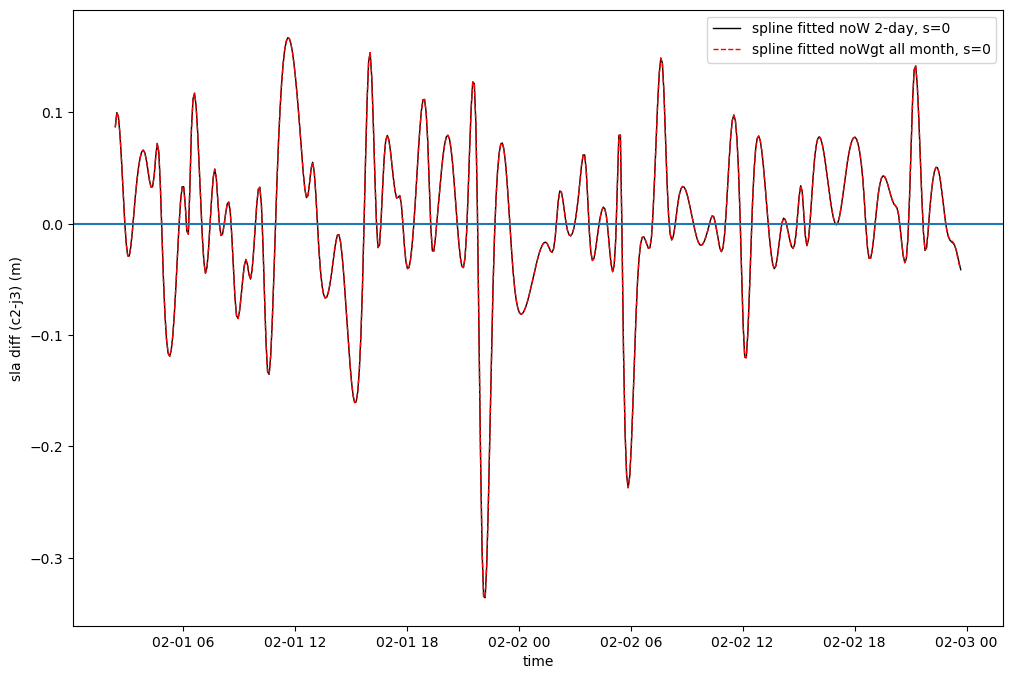

In [11]:
ax.clear()
# ax.plot(x_spl[:1470, 0], y_spl[:1470], 'bo', markersize=6, label='spline knots')
# ax.plot(x_spl[:100, 0], y_spl[:100], 'bo', markersize=6, label='spline knots')
ax.plot(tnew[:len(tnew)-10], fitted_spl_noW[:len(tnew)-10], 'k', linewidth=1, label='spline fitted noW 2-day, s=0')
ax.plot(tnew_all[:len(tnew)-10], fitted_spl_noW_all[:len(tnew)-10], 'r--', linewidth=1, label='spline fitted noWgt all month, s=0')
# ax.plot(tnew_all[:len(tnew_all)-10], fitted_spl_noW_s1_all[:len(tnew_all)-10], 'k--', linewidth=1, label='spline fitted noWgt, s=0.1')

#ax.plot(tnew[:len(tnew)-10], fitted_spl_noW_all[:len(tnew)-10], 'r', linewidth=1, label='spline fitted noWgt all month, s=0')

# ax.plot(tnew_all[:len(tnew_all)-10], fitted_spl_w_t_s1_all[:len(tnew_all)-10], 'r', linewidth=1, label='spline fitted timeWgt, s=0.1')

#ax.plot(tnew[:len(tnew)-10], fitted_spl_w_d_s1[:len(tnew)-10], 'g', linewidth=1, label='spline fitted stdWgt, s=0.1')

# 1550 for 100 knots, 3500 for 200 knots, 6000 for 300 knots, 8500 for 400 knots,
# 14000 for 600 knots, 18000 for 800 knots, 21000 for 900 knots, 
# ax.plot(ds_cx['time'][:34000, 0], sla_diff.data[:34000], 'ro', markersize=2, label='obs diff c2-j3')
#ax.plot(ds_cx['time'][:1550, 0], sla_diff.data[:1550], 'yo', markersize=2, label='obs diff c2-j3')
ax.axhline()
# ax.plot(x[0:1000], ds_cx['track'][0:1000, 1], label='j3')
ax.set_xlabel('time')
ax.set_ylabel('sla diff (c2-j3) (m)')
ax.legend()
fig
# fig.savefig('cubicSplineFitting_100knot_withWgt_s_07.png')

In [ ]:
# 2023-10-21, currently invalid code section, not to run now, copied from checkCrossover_c2_j3.ipynb

ax.clear()

# ax.plot(x_spl[:1470, 0], y_spl[:1470], 'bo', markersize=6, label='spline knots')
ax.plot(x_spl[:150, 0], y_spl[:150], 'bo', markersize=6, label='spline knots')

#ax.plot(tnew[:len(tnew)-50], fitted_spl_noW[:len(tnew)-50], 'k', linewidth=1, label='spline fitted noW 2-day, s=0')
#ax.plot(tnew[:len(tnew)-50], fitted_spl_noW_s1[:len(tnew)-50], 'r--', linewidth=1, label='spline fitted noW 2-day, s=0.1')
ax.plot(tnew[:len(tnew)-50], fitted_spl_noW_s1_all[:len(tnew)-50], 'b', linewidth=1, label='spline fitted noW all month, s=0.1')

# ax.plot(tnew_all[:len(tnew)-10], fitted_spl_noW_all[:len(tnew)-10], 'r--', linewidth=1, label='spline fitted noWgt all month, s=0')
#ax.plot(tnew_all[:len(tnew_all)-10], fitted_spl_noW_s1_all[:len(tnew_all)-10], 'k--', linewidth=1, label='spline fitted noWgt, s=0.1')

#ax.plot(tnew[:len(tnew)-10], fitted_spl_noW_all[:len(tnew)-10], 'r', linewidth=1, label='spline fitted noWgt all month, s=0')

# ax.plot(tnew_all[:len(tnew_all)-10], fitted_spl_w_t_s1_all[:len(tnew_all)-10], 'r', linewidth=1, label='spline fitted timeWgt, s=0.1')

#ax.plot(tnew[:len(tnew)-10], fitted_spl_w_d_s1[:len(tnew)-10], 'g', linewidth=1, label='spline fitted stdWgt, s=0.1')


# 1550 for 100 knots, 3500 for 200 knots, 6000 for 300 knots, 8500 for 400 knots,
# 14000 for 600 knots, 18000 for 800 knots, 21000 for 900 knots, 
# ax.plot(ds_cx['time'][:34000, 0], sla_diff.data[:34000], 'ro', markersize=2, label='obs diff c2-j3')
ax.plot(ds_cx['time'][:1550, 0], sla_diff.data[:1550], 'yo', markersize=2, label='obs diff c2-j3')
ax.axhline()
# ax.plot(x[0:1000], ds_cx['track'][0:1000, 1], label='j3')
ax.set_xlabel('time')
ax.set_ylabel('sla diff (c2-j3) (m)')
ax.legend()
fig
# fig.savefig('cubicSplineFitting_noWgt_30-day_S0.1_01.png')

In [ ]:
#print(len(sla_diff_on_fitted_spl_no_w_all_s_0))
#print(type(sla_diff_on_fitted_spl_no_w_all_s_0))
#print('\n')
#print(ds_cx)
#print('\n')


# used as template
abs_fn_c2 = '/glade/scratch/lgchen/data/OISSH_NOAA/2000-2022_fromEric/misc/c2_20220201.nc'
ds_c2_temp = xr.open_dataset(filename_or_obj = abs_fn_c2, mask_and_scale = True, decode_times = True)
# ds_c2_temp.dims['time'] = 34661  # not gonna work
ds_c2_temp = ds_c2_temp.head(34661)  # this is how you reduce the dimension
#print(ds_c2_temp)
#print('\n')

ds_c2_temp['lon'].data = ds_cx['lon'].data
ds_c2_temp['lat'].data = ds_cx['lat'].data

ds_c2_temp['time_mjd'].data = ds_cx['time'].data[:, 0]  # seems to be ok?! 
ds_cx_c2_track = ds_cx['track'][:, 0].data
#print(type(ds_cx_c2_track))
ds_c2_temp['cycle'].data = ds_cx['cycle'].data[ds_cx_c2_track]
ds_c2_temp['pass'].data = ds_cx['pass'].data[ds_cx_c2_track]
# ds_c2_temp['latency'], remain unchanged.
# global attributes modification
ds_c2_temp.attrs['filename'] = ''

#ds_c2_temp['sla'].data = ds_cx['sla'].data[:, 0] - sla_diff_on_fitted_spl_no_w_all_s_0
#ds_c2_temp.to_netcdf('corrected_c2_by_j3_2022Feb-no_w_all_s_0.nc')

#ds_c2_temp['sla'].data = ds_cx['sla'].data[:, 0] - sla_diff_on_fitted_spl_no_w_all_s_01
#ds_c2_temp.to_netcdf('corrected_c2_by_j3_2022Feb-no_w_all_s_01.nc')

#ds_c2_temp['sla'].data = ds_cx['sla'].data[:, 0] - sla_diff_on_fitted_spl_no_w_all_s_02
#ds_c2_temp.to_netcdf('corrected_c2_by_j3_2022Feb-no_w_all_s_02.nc')

#ds_c2_temp['sla'].data = ds_cx['sla'].data[:, 0] - sla_diff_on_fitted_spl_w_t_all_s_005
#ds_c2_temp.to_netcdf('corrected_c2_by_j3_2022Feb-w_t_all_s_005.nc')

#ds_c2_temp['sla'].data = ds_cx['sla'].data[:, 0] - sla_diff_on_fitted_spl_w_t_all_s_01
#ds_c2_temp.to_netcdf('corrected_c2_by_j3_2022Feb-w_t_all_s_01.nc')

#ds_c2_temp['sla'].data = ds_cx['sla'].data[:, 0] - sla_diff_on_fitted_spl_w_d_all_s_001
#ds_c2_temp.to_netcdf('corrected_c2_by_j3_2022Feb-w_d_all_s_001.nc')

#ds_c2_temp['sla'].data = ds_cx['sla'].data[:, 0] - sla_diff_on_fitted_spl_w_d_all_s_005
#ds_c2_temp.to_netcdf('corrected_c2_by_j3_2022Feb-w_d_all_s_005.nc')